# Author : Aditya Gupta

# Data Science and Business Analytics Internship

# GRIP The Spark Foundation

# ###GRIPDEC'20

## Predict the percentage of an student based on the no. of study hours

## TASK: What will be predicted score if a student studies for 9.25 hrs/ day? 

## Dataset :  http://bit.ly/w-data 

In [1]:
# Importing all the Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
marks = pd.read_csv(url)
print("Data imported successfully")
marks.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<Figure size 720x720 with 0 Axes>

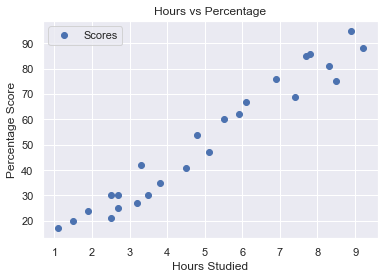

In [3]:
# Plotting the distribution of scores
plt.figure(figsize = (10,10))
marks.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the graph we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the Data

In [4]:
# Splitting the input and output features.
X = marks.iloc[:, :-1].values  
y = marks.iloc[:, 1].values  

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [6]:
# Training the Algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


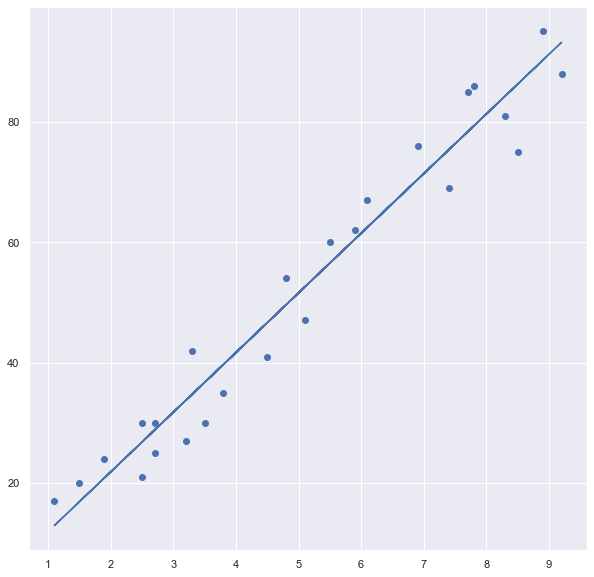

In [7]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize = (10,10))
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [8]:
# Testing Data - In Hours
print(X_test)
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing Actual vs Predicted
study = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
study

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
# We can also test with our own data
Pred = regressor.predict([[9.25]]) 
print(Pred[0]) 

93.69173248737538


In [11]:
# Evaluating the model
from sklearn import metrics  
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Square Error: 21.5987693072174
Root Mean Square Error: 4.6474476121003665


### The predicted score if a student studies for 9.25 hrs/day is approx 94 marks.